# IS460 Machine Learning & Applications - Logistic Regression

## <i>Unravelling the Shift in Air Travel Preferences 🛫</i>

<u>Class Group No.:</u> G1<br>
<u>Student Group No.:</u> 5<br>
<u>Team Member Details:</u>
<table align='left'>
    <tr>
        <td><strong>Full Name</strong></td>
        <td><strong>Matriculation No.</strong></td>
    </tr>
    <tr>
        <td>Goh Nina Melda</td>
        <td>01445491</td>
    </tr>
    <tr>
        <td>Laetitia Hong Jae-ee</td>
        <td>01440359</td>
    </tr>
    <tr>
        <td>Leong Chong Gui</td>
        <td>01520030</td>
    </tr>
    <tr>
        <td>Ng Wei Lun Andrew</td>
        <td>01397857</td>
    </tr>
    <tr>
        <td>Sze Xin Wei</td>
        <td>01394966</td>
    </tr>
</table>

#

# Table of Contents
<table align='left'>
    <tr>
        <td><strong>No.</strong></td>
        <td><strong>Section Title</strong></td>
    </tr>
    <tr>
        <td align='center'>1</td>
        <td><a href='#1.-Dataset-Overview'>Dataset Overview</a></td>
    </tr>
    <tr>
        <td align='center'>2</td>
        <td><a href='#2.-Logistic-Regression-Model'>Logistic Regression Model</a></td>
    </tr>
</table>

#

# 1. Dataset Overview

The table below summarises the properties of the attributes of our data source (not in chronological order).<br><br>
<i><u>Source:</u> Vyshnia, G. (2023). Kaggle. <a href='https://www.kaggle.com/code/gvyshnya/airline-reviews-sentiments-ts-and-eda/input'>Link to dataset.</a></i>
<hr>

<table align='left' style='word-wrap: break-word'>
    <tr>
        <td><strong>Category</strong></td>
        <td><strong>Name</strong></td>
        <td><strong>Data Type</strong></td>
        <td><strong>Description</strong></td>
    </tr>
    <tr>
        <td rowspan='11'>Qualitative descriptive data</td>
        <td>Serial Number</td>
        <td>Integer</td>
        <td>Indication of row indices.</td>
    </tr>
    <tr>
        <td>Airline Name</td>
        <td>String</td>
        <td>Name of airline being reviewed.</td>
    </tr>
    <tr>
        <td>Review_Title</td>
        <td>String</td>
        <td>Title of user-generated review.</td>
    </tr>
    <tr>
        <td>Review Date</td>
        <td>String</td>
        <td>Date of review submission, with format DD% Month YYYY.</td>
    </tr>
    <tr>
        <td>Verified</td>
        <td>Boolean</td>
        <td>Binary indication of whether the reviewer is verified (represented as 'True'), or not (represented as 'False').</td>
    </tr>
    <tr>
        <td>Review</td>
        <td>String</td>
        <td>Detailed user-generated review of airline experience.</td>
    </tr>
    <tr>
        <td>Aircraft</td>
        <td>String</td>
        <td>Model of aircraft boarded by user.</td>
    </tr>
    <tr>
        <td>Type of Traveller</td>
        <td>String</td>
        <td>Categorical indication of purpose of travel, designated by the following unique values:
            <li>Business</li>
            <li>Couple Leisure</li>
            <li>Family Leisure</li>
            <li>Solo Leisure</li>
        </td>
    </tr>
    <tr>
        <td>Seat Type</td>
        <td>String</td>
        <td>Categorical indication of class of seating, designated by the following unique values:
            <li>First Class</li>
            <li>Business Class</li>
            <li>Premium Economy</li>
            <li>Economy Class</li>
        </td>
    </tr>
    <tr>
        <td>Route</td>
        <td>String</td>
        <td>Specific flight route, with the following format: [Departure Destination] to [Arrival Destination].</td>
    </tr>
    <tr>
        <td>Date Flown</td>
        <td>String</td>
        <td>Month and Year of flight.</td>
    </tr>
    <tr>
        <td rowspan='9'>Quantitative descriptive data</td>
        <td>Overall_Rating</td>
        <td>Integer</td>
        <td>Ordinal rating given by user, with values between the range of 1-10.</td>
    </tr>
    <tr>  
        <td>Seat Comfort</td>
        <td>Float</td>
        <td rowspan='7'>Ordinal rating ranging from 1.0 to 5.0.</td>
    </tr>
    <tr>
        <td>Cabin Staff Service</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Food & Beverages</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Ground Service</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Inflight Entertainment</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Wifi & Connectivity</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Value For Money</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Recommended</td>
        <td>String</td>
        <td>Binary indication of whether the user recommends the airline (represented as 'yes') or not (represented as 'no').</td>
    </tr>
</table>

<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

#

# 2. Logistic Regression Model

<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

In [28]:
# Import train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScaler to standardize the feature values (mean=0, std=1)
from sklearn.preprocessing import StandardScaler

# Import LogisticRegression to create and train a logistic regression model
from sklearn.linear_model import LogisticRegression

# Import metrics to evaluate the model's performance (e.g., accuracy, precision, recall, etc.)
from sklearn import metrics

# To visualise the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import pandas to handle data as DataFrames (data manipulation, reading CSV files, etc.)
import pandas as pd

# Import plt for plotting visualizations
import matplotlib.pyplot as plt

# Load the post-COVID dataset into a DataFrame called post_covid
post_covid = pd.read_csv('post_covid.csv')

# Load the pre-COVID dataset into a DataFrame called pre_covid_new
pre_covid_new = pd.read_csv('pre_covid_new.csv')


In [29]:
# Step 1: Select features (X) from the pre-COVID dataset
# These are the quantitative attributes related to airline experience
X = pre_covid_new[['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                   'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']]

# Step 2: Select the target variable (y) which indicates whether a recommendation was made (Recommended)
y = pre_covid_new['Recommended']

# Step 3: Initialize the StandardScaler to standardize the features in X
# This scales the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

# Fit the scaler to the feature data (X) and apply the transformation
X_scaled = scaler.fit_transform(X)

# Step 4: Split the standardized data into training and testing sets
# 80% of the data is used for training, and 20% for testing, with a random seed (random_state=20) for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

# Step 5: Initialize a logistic regression model and train it on the training data (X_train and y_train)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 6: Use the trained logistic regression model to make predictions on the test data (X_test)
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the performance of the model on the pre-COVID test data
# Print the accuracy, which is the proportion of correct predictions
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Print the precision (the proportion of positive predictions that were correct)
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label=1.0))

# Print the recall (the proportion of actual positives that were correctly identified)
print("Recall:", metrics.recall_score(y_test, y_pred, pos_label=1.0))

# Print the F1-Score (harmonic mean of precision and recall)
print("F1-Score:", metrics.f1_score(y_test, y_pred, pos_label=1.0))


Accuracy: 0.9495181275814594
Precision: 0.946236559139785
Recall: 0.9621530698065601
F1-Score: 0.9541284403669725


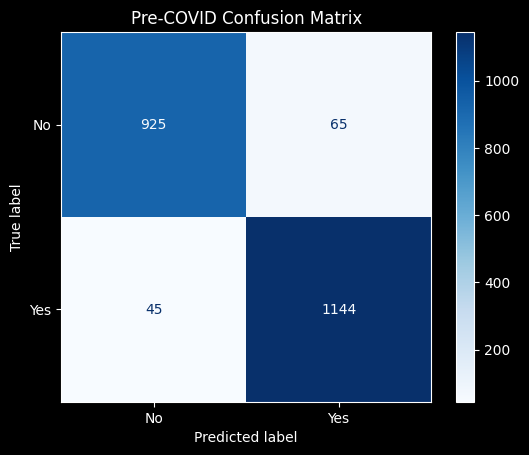

In [30]:
# Set the plot style to dark background
plt.style.use('dark_background')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Pre-COVID Confusion Matrix')
plt.show()


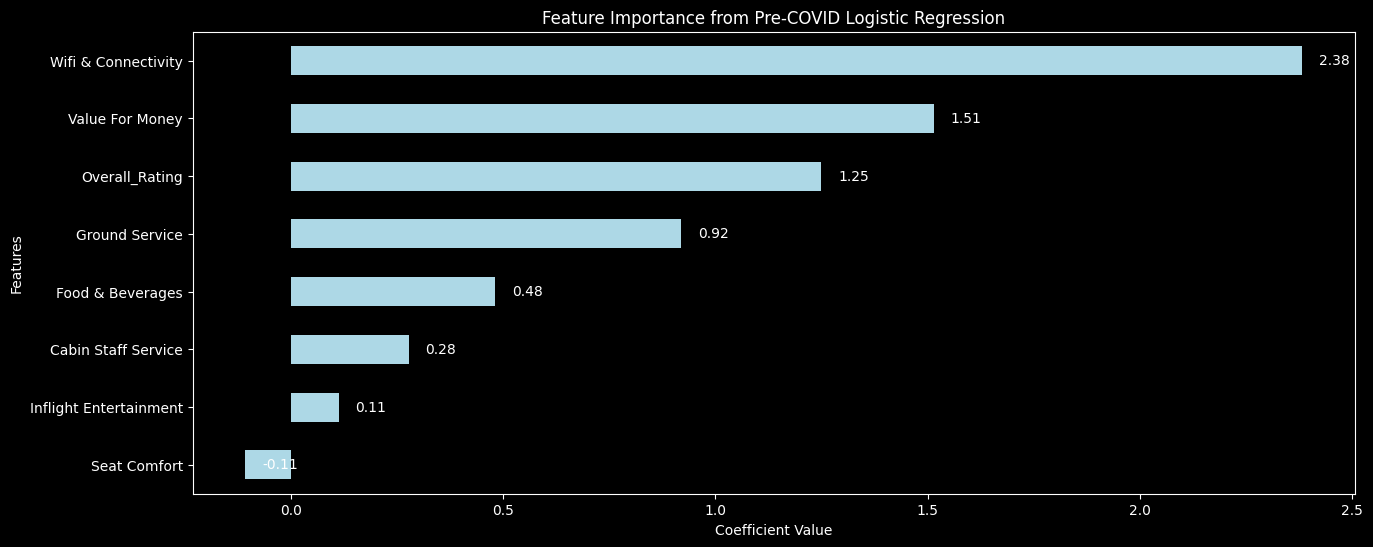

In [38]:
# Visualizing feature importance of logistic regression
feature_importance = pd.Series(logreg.coef_[0], index=X.columns)

# Adjust the width and height as needed
plt.figure(figsize=(15, 6))

# Plot the horizontal bar chart
feature_importance.sort_values().plot(kind='barh', color='lightblue')
plt.title('Feature Importance from Pre-COVID Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Adding x-values next to each bar, shifting them to the right
offset = 0.04  # Adjust this value as needed for more space
for index, value in enumerate(feature_importance.sort_values()):
    plt.text(value + offset, index, f'{value:.2f}', va='center', ha='left', fontsize=10)  # Shift x-value to the right

plt.show()

In [40]:
# Step 1: Select features (X) from the Post-COVID dataset
# These are the quantitative attributes related to airline experience
X = post_covid[['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']]

# Step 2: Select the target variable (y) which indicates whether a recommendation was made (Recommended)
# Convert 'yes' to 1 and 'no' to 0
y = post_covid['Recommended'].map({'yes': 1, 'no': 0})

# Step 3: Initialize the StandardScaler to standardize the features in X
# This scales the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

# Fit the scaler to the feature data (X) and apply the transformation
X_scaled = scaler.fit_transform(X)

# Step 4: Split the standardized data into training and testing sets
# 80% of the data is used for training, and 20% for testing, with a random seed (random_state=20) for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

# Step 5: Initialize a logistic regression model and train it on the training data (X_train and y_train)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 6: Use the trained logistic regression model to make predictions on the test data (X_test)
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the performance of the model on the pre-COVID test data
# Print the accuracy, which is the proportion of correct predictions
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Print the precision (the proportion of positive predictions that were correct)
print("Precision:", metrics.precision_score(y_test, y_pred))

# Print the recall (the proportion of actual positives that were correctly identified)
print("Recall:", metrics.recall_score(y_test, y_pred))

# Print the F1-Score (harmonic mean of precision and recall)
print("F1-Score:", metrics.f1_score(y_test, y_pred))


Accuracy: 0.9697108765488757
Precision: 0.9241245136186771
Recall: 0.9462151394422311
F1-Score: 0.9350393700787402


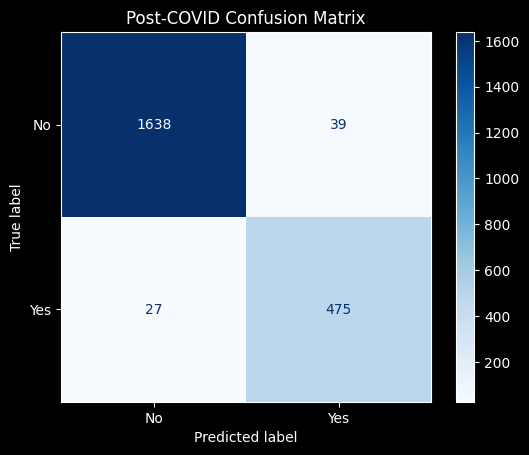

In [41]:
# Set the plot style to dark background
plt.style.use('dark_background')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Post-COVID Confusion Matrix')
plt.show()

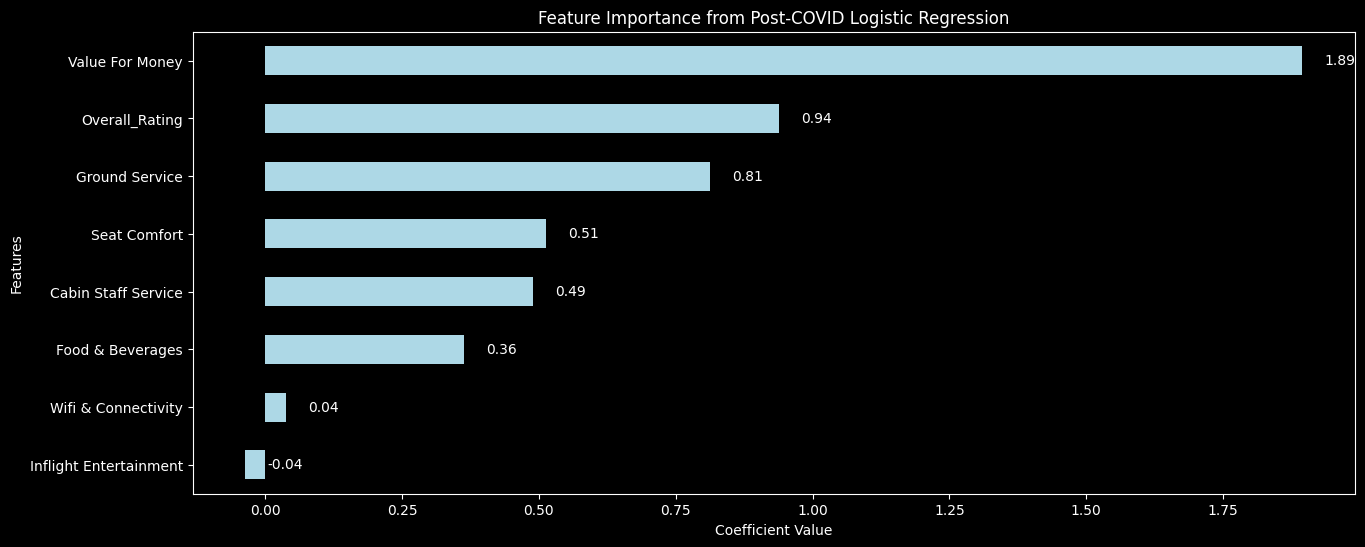

In [42]:
# Visualizing feature importance of logistic regression
feature_importance = pd.Series(logreg.coef_[0], index=X.columns)

# Adjust the width and height as needed
plt.figure(figsize=(15, 6))

# Plot the horizontal bar chart
feature_importance.sort_values().plot(kind='barh', color='lightblue')
plt.title('Feature Importance from Post-COVID Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Adding x-values next to each bar, shifting them to the right
offset = 0.04  # Adjust this value as needed for more space
for index, value in enumerate(feature_importance.sort_values()):
    plt.text(value + offset, index, f'{value:.2f}', va='center', ha='left', fontsize=10)  # Shift x-value to the right

plt.show()

<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i><br><br>
<h4>End of script.</h4>